# Importing the Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [15]:
#importing the dataset
df = pd.read_csv(r'C:\Users\jjjib\Desktop\out.csv')

In [16]:
#Looking into the dataset
df.head()

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,...,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated,CommentDetails,HashTag
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
2,"{""$oid"":""5b1aa7ee8bb55b300895a779""}",5b1aa7ee8bb55b300895a778,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170408029666493""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528412555,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
3,"{""$oid"":""5b1aa7ee8bb55b300895a77b""}",5b1aa7ee8bb55b300895a77a,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169907019716594""}",IMAGE,100000659454027,Gian Fortuin,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,4,0,1528381983,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
4,"{""$oid"":""5b1aa7ee8bb55b300895a77d""}",5b1aa7ee8bb55b300895a77c,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169711059736190""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528371412,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN


In [17]:
#Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [18]:
#Looking it at the shape of the dataset
df.shape

(201886, 32)

In [19]:
#Checking for null values
df.isnull().sum()

_id                             0
Id                              0
GroupId                         0
GroupName                      30
PostId                          0
PostType                        0
UserProfileId                   0
ProfileName                   184
ProfileImage                    0
ProfileImageOriginal            0
Message                         0
FeedText                    34974
FeedDescription            117505
FeedTitle                  152328
postImgUrl                  60040
postImgUrlOriginal          60040
videoTitle                 201886
VideoSiteRedirectionUrl    201886
VideoDescription           201886
PostRedirectionImg         201886
websiteUrl                 201886
NoOfLike                        0
NoOfComment                     0
NoOfShare                       0
DateTimeOfPost                  0
connectionStatus                0
postUrl                         0
DestinationURL             166070
savePostDateTimeUtc             0
mediaPostUrlUp

We see that most of the columns are completely empty and many are partially empty and so we drop the columns and keep only the important one that contains the most information

In [20]:
#Creating the new dataset
df2 = df[["Id","Message"]]

In [21]:
df2.head()

,Id,Message
0,5b1aa7ee8bb55b300895a774,Youre about to GET LUCKY! Rise and shine. HAP...
1,5b1aa7ee8bb55b300895a776,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re..."
2,5b1aa7ee8bb55b300895a778,Start PRESSING with FORWARD moving people!\r\...
3,5b1aa7ee8bb55b300895a77a,Everyone can do it as the work required to ea...
4,5b1aa7ee8bb55b300895a77c,You have a habit of waking up every morning t...


# EDA

In [22]:
#Creating iterable set for stopwords
stop_words = set(stopwords.words("english"))

In [23]:
#Checking the length of the message
df2['length']=df2['Message'].apply(len)
df2.head(3)

,Id,Message,length
0,5b1aa7ee8bb55b300895a774,Youre about to GET LUCKY! Rise and shine. HAP...,174
1,5b1aa7ee8bb55b300895a776,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...",154
2,5b1aa7ee8bb55b300895a778,Start PRESSING with FORWARD moving people!\r\...,119


In [24]:
#Defining a function to clean the data
def text_process(data):
    nopunc=[char.lower() for char in data if char not in string.punctuation]
    nopunc=''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stop_words]
    clean = ' '.join(clean)
    return clean

In [25]:
#Creating a column with clean data
df2["clean"] = df2["Message"].apply(text_process)

In [26]:
df2.head()

,Id,Message,length,clean
0,5b1aa7ee8bb55b300895a774,Youre about to GET LUCKY! Rise and shine. HAP...,174,youre get lucky rise shine happy friday allsta...
1,5b1aa7ee8bb55b300895a776,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...",154,rest tomorrows big day you039re alot closer re...
2,5b1aa7ee8bb55b300895a778,Start PRESSING with FORWARD moving people!\r\...,119,start pressing forward moving people good even...
3,5b1aa7ee8bb55b300895a77a,Everyone can do it as the work required to ea...,379,everyone work required earn consistently minim...
4,5b1aa7ee8bb55b300895a77c,You have a habit of waking up every morning t...,179,habit waking every morning go work grand thurs...


# Splitting the dataset

In [29]:
#Schuffling the dataset and splitting into 3
train, validate, test = np.split(df2.sample(frac=1, random_state=42), [int(.85*len(df)), int(.9*len(df))])

In [30]:
#Checking the shape of train
train.shape

(171603, 4)

In [31]:
#Checking the shape of validate
validate.shape

(10094, 4)

In [32]:
#Checking the shape of test
test.shape

(20189, 4)

# Training Model

In [33]:
#Defining the tf-idf-vectorizer
features = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [94]:
#Creating the vector
prep = features.fit(train["clean"])
message = prep.transform(train["clean"])

In [35]:
km = KMeans(n_clusters=4)
km.fit(message)
y = km.predict(message)
#adding the labels to a column named intent
train["intent"] = y
#The new dataframe with the clustering done
train.head()

,Id,Message,length,clean,intent
122231,5bd84aa98bb55b1b4079f629,"The iris M 11x15, strathmore, cold press, ...",66,iris 11x15 strathmore cold press cotman waterc...,1
116267,5bd3e9268bb55b0a3ccc1373,TensorFlow: Building Feed-Forward Neural Netwo...,386,tensorflow building feedforward neural network...,1
189092,5d050048a3df632b3c95ad40,vimono..elfu 15 magauni elfu 15 mabwanga elfu...,88,vimonoelfu 15 magauni elfu 15 mabwanga elfu 7 ...,1
17074,5b339b768bb55b1c9483838a,The Maldives Are Calling Your Name? | Laptop L...,283,maldives calling name laptop lifestylist one w...,1
195871,5d0cd44aa3df631f0021a66c,INFORMATIC WEBSITE WITH 5 PAGES @ 2500/- CONT...,154,informatic website 5 pages 2500 contact 918511...,1


In [36]:
#Checking for the classification
train["intent"].unique()

array([1, 3, 0, 2])

In [37]:
#Checking the value count for each classification
train["intent"].value_counts()

1    144745
3     17292
0      7820
2      1746
Name: intent, dtype: int64

# Intent classification

In [60]:
text0 = " ".join(train["clean"][train["intent"]==0])

(-0.5, 399.5, 199.5, -0.5)

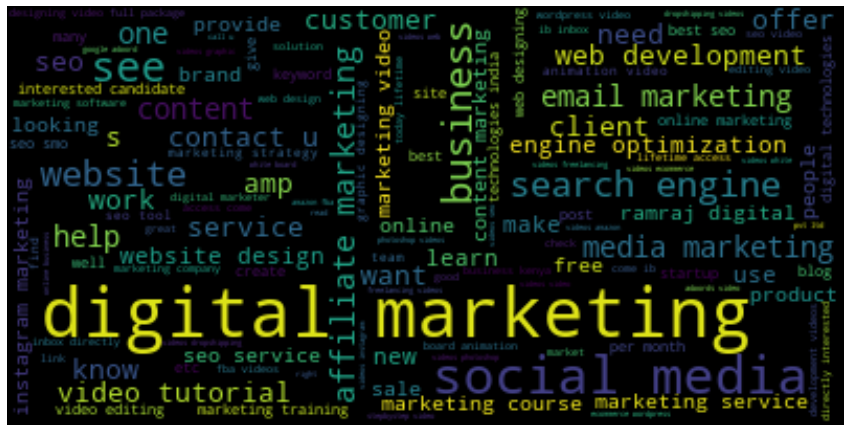

In [87]:
# Create and Generate a Word Cloud Image
wordcloud = WordCloud().generate(text0)
#Display the generated image
plt.figure(figsize=[15,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [62]:
text1 = " ".join(train["clean"][train["intent"]==1])

(-0.5, 399.5, 199.5, -0.5)

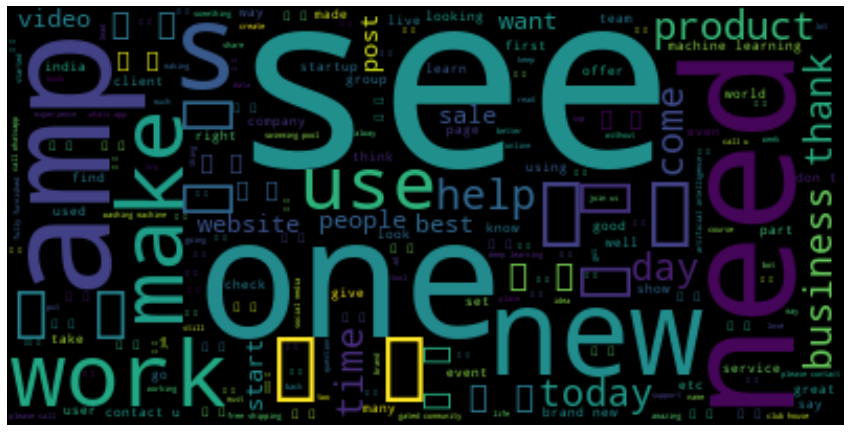

In [84]:
# Create and Generate a Word Cloud Image
wordcloud = WordCloud().generate(text1)
#Display the generated image
plt.figure(figsize=[15,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [64]:
text2 = " ".join(train["clean"][train["intent"]==2])

(-0.5, 399.5, 199.5, -0.5)

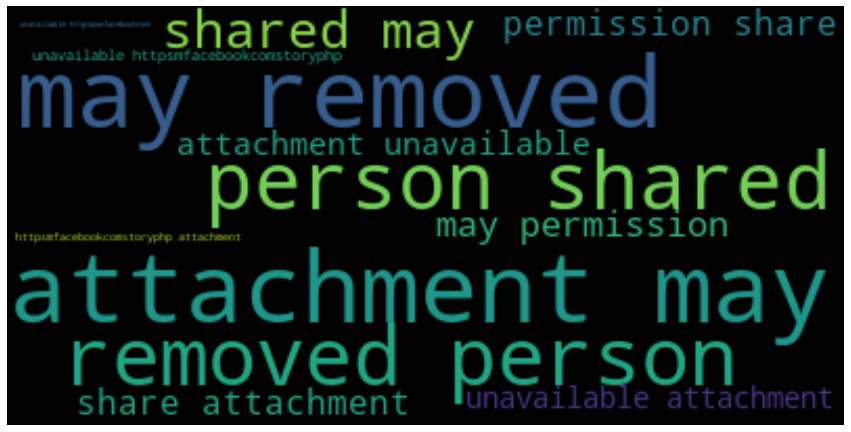

In [85]:
# Create and Generate a Word Cloud Image
wordcloud = WordCloud().generate(text2)
#Display the generated image
plt.figure(figsize=[15,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [66]:
text3 = " ".join(train["clean"][train["intent"]==3])

(-0.5, 399.5, 199.5, -0.5)

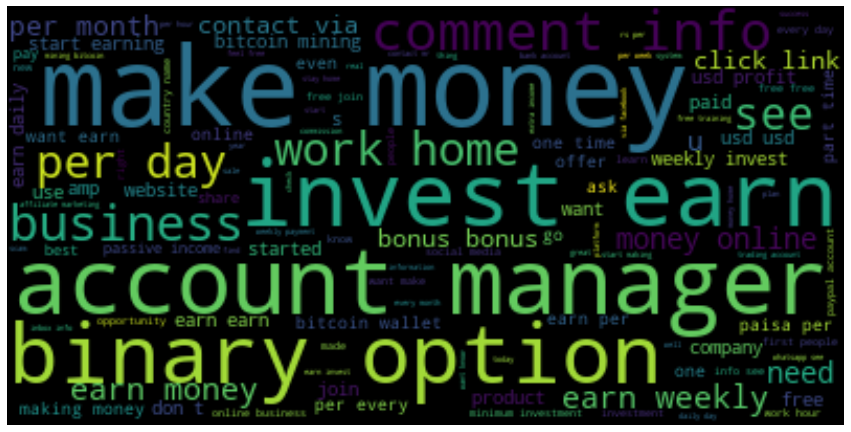

In [86]:
# Create and Generate a Word Cloud Image
wordcloud = WordCloud().generate(text3)
#Display the generated image
plt.figure(figsize=[15,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

From the above word cloud, we can make out the classification of intents as follows:
- 0 : Buyer & Seller 
- 1 : Seller
- 2 : Neutral
- 3 : Buyer

# Saving the model

In [89]:
#Saving the best model using pickle
joblib.dump(km,"intent_cluster.pkl")

['intent_cluster.pkl']

# Validation set Predictions

In [91]:
validate.shape

(10094, 4)

In [95]:
#Creating the vector
message = prep.transform(validate["clean"])

In [96]:
y = km.predict(message)
#adding the labels to a column named intent
validate["intent"] = y
#The new dataframe with the clustering done
validate.head()

,Id,Message,length,clean,intent
81083,5b84eb908bb55b37cce18060,"need business explanatory videos, limited bud...",72,need business explanatory videos limited budge...,1
29036,5b3dbb998bb55b25c894e99b,*VIEW 20 ADDS DAILY ON UR PHONE/PC/LAPTOP AND...,550,view 20 adds daily ur phonepclaptop earn money...,3
50975,5b596d1f8bb55b350859036f,Why digital marketing is a future Dominator-(2...,288,digital marketing future dominator2018 case st...,0
201598,5d10e667a3df632038815c23,"If you are trying to improve your life , ma...",403,trying improve life make money become better p...,1
150576,5c1349e68bb55b2ea8514a3d,Know Your Produce What's your favorite way to ...,192,know produce whats favorite way use roasted re...,1


# Classifying and saving the data

In [98]:
#Renaming classification
train["intent"].replace({0:'Buyer & Seller', 1:'Seller', 2:'Neutral', 3:'Buyer'}, inplace=True)

In [99]:
#Exporting the data
train.to_csv('train_Intent.csv')

In [100]:
#Renaming classification
validate["intent"].replace({0:'Buyer & Seller', 1:'Seller', 2:'Neutral', 3:'Buyer'}, inplace=True)

In [101]:
#Exporting the data
validate.to_csv('validate_Intent.csv')

In [102]:
#Exporting the data
test.to_csv('test2use.csv')